# Step1: Loading and gathering the data.

### Importing necessary libraries

In [78]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

from sklearn.metrics import f1_score, recall_score, precision_score


In [79]:
### reading the files

In [80]:
dataframe = pd.read_csv("survey_results_public 22.csv")

#### The goal of this project would be to see if it is possible to predict the years of coding a developer has based on various data inputs that will be decided based on whether or not there is a correlation between certain data

#### The data source for this project is the "Stack Overflow Annual Developer Survey". Specifically, I'll be using the 2022 data to train the model and then mayber test the resulted trained model on the 23 data.



#### Initial comparison between the two years was done to see which columns were common, there are 63 common coloumns. Of coures, any coloumns that are dropped here for the '22' data in the coures of the data cleaning and preperation would also be dropped in the '23' data to ensure correct measure of the model accuracy that would be based on factors other than the data (i.e., hyber parameters adjustments).

# Step 2: Data Assessment.

In [81]:
dataframe

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
4,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73263,73264,I am a developer by profession,"Employed, full-time",Fully remote,Freelance/contract work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,Technical documentation;Blogs;Written Tutorial...,Udemy,8,...,30-60 minutes a day,Less than 15 minutes a day,Just right,DevOps function;Microservices;Developer portal...,Yes,Yes,Yes,Too long,Easy,NaN
73264,73265,I am a developer by profession,"Employed, full-time",Full in-person,Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,Coursera;Udemy;Udacity,6,...,15-30 minutes a day,60-120 minutes a day,Very long,None of these,No,Yes,Yes,Too long,Easy,NaN
73265,73266,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby;School or academic work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,Technical documentation;Programming Games;Stac...,Udemy;Codecademy;Pluralsight;edX,42,...,30-60 minutes a day,60-120 minutes a day,Just right,None of these,No,No,No,Appropriate in length,Easy,NaN
73266,73267,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;On the job training,NaN,NaN,50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN


### 1st, Based on initial assessment of the '22' and '23' data. I can see that there are some uncommon columns. I'll remove the uncommon columns between 22 & 23 data from the 22 columns, the 23 uncommon columns will be removed later. 

In [82]:
dataframe = dataframe.drop(['CompFreq', 'VersionControlSystem', 'VCInteraction', 'VCHostingPersonal use', 'VCHostingProfessional use', 'Blockchain'],axis=1)
dataframe = dataframe.drop(['Gender', 'Sexuality', 'Ethnicity', 'Accessibility', 'MentalHealth'],axis=1)
dataframe = dataframe.drop(['Onboarding', 'TrueFalse_1', 'TrueFalse_2', 'TrueFalse_3'],axis=1)


### Getting a basic understanding of the dataset

In [83]:
dataframe.describe()

,ResponseId,CompTotal,WorkExp,ConvertedCompYearly
count,73268.000000,3.842200e+04,36769.000000,3.807100e+04
mean,36634.500000,2.342434e+52,10.242378,1.707613e+05
std,21150.794099,4.591478e+54,8.706850,7.814132e+05
min,1.000000,0.000000e+00,0.000000,1.000000e+00
25%,18317.750000,3.000000e+04,4.000000,3.583200e+04
50%,36634.500000,7.750000e+04,8.000000,6.784500e+04
75%,54951.250000,1.540000e+05,15.000000,1.200000e+05
max,73268.000000,9.000000e+56,50.000000,5.000000e+07


### Seeing if there  are any null values in the dataset

In [84]:
dataframe.isnull().sum()

ResponseId                 0
MainBranch                 0
Employment              1559
RemoteWork             14310
CodingActivities       14369
                       ...  
TimeAnswering          37246
ProfessionalTech       38362
SurveyLength            2824
SurveyEase              2760
ConvertedCompYearly    35197
Length: 64, dtype: int64

In [85]:
dataframe.head()

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,Knowledge_7,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
4,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN


### Checking amount of unique values

In [86]:
dataframe.nunique()

ResponseId             73268
MainBranch                 6
Employment               103
RemoteWork                 3
CodingActivities          63
                       ...  
TimeAnswering              5
ProfessionalTech         155
SurveyLength               3
SurveyEase                 3
ConvertedCompYearly     7909
Length: 64, dtype: int64

In [87]:
# for col in dataframe.columns:
#     print(f"Unique values in '{col}':")
#     print(dataframe[col].unique())
#     print()
#     print()
#     print()


### Some cols have nan only and some cols have low unique values and some have high unique values. 
### This analysis is important as to decide how to proceed with data selection, cleaning, and conversion of data. 

### For now, the following string coloumns can be turned into numrical values: 
##### MainBranch
##### Employment
##### EdLevel
##### YearsCode (already a number value that needs its type to be changed to an int)
##### OpSysProfessional use
##### OpSysPersonal use
##### VCInteraction
##### Blockchain
##### NEWSOSites
##### SOVisitFreq
##### SOAccount
##### Age
##### Accessibility
##### MentalHealth

### It was noted that some of the columns don't have that many unique values such as employement, rather, they have different combinations of a small number of unique values which results in a big number of the unique values count.

In [88]:
for col in dataframe.columns:
    print(f"Number of unique values in '{col}' is: '{dataframe[col].nunique()}':")

Number of unique values in 'ResponseId' is: '73268':
Number of unique values in 'MainBranch' is: '6':
Number of unique values in 'Employment' is: '103':
Number of unique values in 'RemoteWork' is: '3':
Number of unique values in 'CodingActivities' is: '63':
Number of unique values in 'EdLevel' is: '9':
Number of unique values in 'LearnCode' is: '737':
Number of unique values in 'LearnCodeOnline' is: '7192':
Number of unique values in 'LearnCodeCoursesCert' is: '206':
Number of unique values in 'YearsCode' is: '52':
Number of unique values in 'YearsCodePro' is: '52':
Number of unique values in 'DevType' is: '9984':
Number of unique values in 'OrgSize' is: '10':
Number of unique values in 'PurchaseInfluence' is: '3':
Number of unique values in 'BuyNewTool' is: '125':
Number of unique values in 'Country' is: '180':
Number of unique values in 'Currency' is: '142':
Number of unique values in 'CompTotal' is: '3179':
Number of unique values in 'LanguageHaveWorkedWith' is: '25068':
Number of u

### The decision to make about the data frame based on the initial analysis of the data frame so far:
##### Coloumns with zero unique values would be dropped
##### Coloumns with above 15% 'nan' values would be dropped
##### Columns with too many unique values would be dropped in case they weren't numerical and there was no way to utalize as a categorical data


# Step 3: Deciding a potential 'Y' value:

### I have decided that the "Y" value would be the "YearsCode", as this would be an interesting output to predict and since it is a value that exists in both the 22 and 23 survey results. 

### Also, the value here in all of the data set consists only of 52 values in total, which means, a classifier or some other model can be used for this as the data is not numerical or continues in nature.
###

# Step 4: Data Cleaning.

### Getting the precentage of 'NaN' values.

In [89]:
for col in dataframe.columns:
    print(f"precentage of NaN values in '{col}' is: '{dataframe[col].isnull().mean() * 100}':")

precentage of NaN values in 'ResponseId' is: '0.0':
precentage of NaN values in 'MainBranch' is: '0.0':
precentage of NaN values in 'Employment' is: '2.127804771523721':
precentage of NaN values in 'RemoteWork' is: '19.531036741824533':
precentage of NaN values in 'CodingActivities' is: '19.611563028880276':
precentage of NaN values in 'EdLevel' is: '2.3161543920947754':
precentage of NaN values in 'LearnCode' is: '2.3038707211879674':
precentage of NaN values in 'LearnCodeOnline' is: '30.822460009826933':
precentage of NaN values in 'LearnCodeCoursesCert' is: '59.88835507998035':
precentage of NaN values in 'YearsCode' is: '2.643718949609652':
precentage of NaN values in 'YearsCodePro' is: '29.255609543047445':
precentage of NaN values in 'DevType' is: '16.33182289676257':
precentage of NaN values in 'OrgSize' is: '30.339302287492494':
precentage of NaN values in 'PurchaseInfluence' is: '30.434841950101':
precentage of NaN values in 'BuyNewTool' is: '7.240541573401758':
precentage of 

### Dropping columns with more than 15% nan values

In [90]:
dataframe = dataframe.dropna(axis=1, thresh = len(dataframe) - (len(dataframe) * 0.15))

### Getting the precentage of nan value in the remaining columns that are less than 15% nan values



In [91]:
for col in dataframe.columns:
    print(f"precentage of NaN values in '{col}' is: '{dataframe[col].isnull().mean() * 100}':")

precentage of NaN values in 'ResponseId' is: '0.0':
precentage of NaN values in 'MainBranch' is: '0.0':
precentage of NaN values in 'Employment' is: '2.127804771523721':
precentage of NaN values in 'EdLevel' is: '2.3161543920947754':
precentage of NaN values in 'LearnCode' is: '2.3038707211879674':
precentage of NaN values in 'YearsCode' is: '2.643718949609652':
precentage of NaN values in 'BuyNewTool' is: '7.240541573401758':
precentage of NaN values in 'Country' is: '2.0431839274990446':
precentage of NaN values in 'LanguageHaveWorkedWith' is: '3.129606376590053':
precentage of NaN values in 'LanguageWantToWorkWith' is: '8.518043347709778':
precentage of NaN values in 'NEWCollabToolsHaveWorkedWith' is: '3.9867336354206473':
precentage of NaN values in 'NEWCollabToolsWantToWorkWith' is: '12.502047278484469':
precentage of NaN values in 'OpSysProfessional use' is: '10.598078287929246':
precentage of NaN values in 'OpSysPersonal use' is: '3.1459846044657973':
precentage of NaN values in

In [92]:
dataframe

,ResponseId,MainBranch,Employment,EdLevel,LearnCode,YearsCode,BuyNewTool,Country,LanguageHaveWorkedWith,LanguageWantToWorkWith,...,OpSysProfessional use,OpSysPersonal use,NEWSOSites,SOVisitFreq,SOAccount,SOComm,Age,z,SurveyLength,SurveyEase
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",NaN,NaN,NaN,NaN,Canada,JavaScript;TypeScript,Rust;TypeScript,...,macOS,Windows Subsystem for Linux (WSL),Collectives on Stack Overflow;Stack Overflow f...,Daily or almost daily,Yes,Not sure,NaN,NaN,Too long,Difficult
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,14,NaN,United Kingdom of Great Britain and Northern I...,C#;C++;HTML/CSS;JavaScript;Python,C#;C++;HTML/CSS;JavaScript;TypeScript,...,Windows,Windows,Collectives on Stack Overflow;Stack Overflow;S...,Multiple times per day,Yes,Neutral,25-34 years old,No,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,"Employed, full-time","Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",20,Other (please specify):,Israel,C#;JavaScript;SQL;TypeScript,C#;SQL;TypeScript,...,Windows,Windows,Collectives on Stack Overflow;Stack Overflow f...,Daily or almost daily,Yes,"Yes, definitely",35-44 years old,No,Appropriate in length,Easy
4,5,I am a developer by profession,"Employed, full-time","Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",8,Start a free trial;Visit developer communities...,United States of America,C#;HTML/CSS;JavaScript;SQL;Swift;TypeScript,C#;Elixir;F#;Go;JavaScript;Rust;TypeScript,...,Windows,macOS;Windows,Collectives on Stack Overflow;Stack Overflow f...,Multiple times per day,Yes,"Yes, definitely",25-34 years old,NaN,Too long,Easy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73263,73264,I am a developer by profession,"Employed, full-time","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,8,Visit developer communities like Stack Overflo...,Nigeria,Bash/Shell;Dart;JavaScript;PHP;Python;SQL;Type...,Bash/Shell;Go;JavaScript;Python;SQL;TypeScript,...,macOS,Linux-based;macOS,Stack Overflow;Stack Exchange,Daily or almost daily,Yes,"Yes, definitely",25-34 years old,No,Too long,Easy
73264,73265,I am a developer by profession,"Employed, full-time","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Other online resources (e.g., videos, blogs, f...",6,Other (please specify):;Ask developers I know/...,United States of America,Bash/Shell;HTML/CSS;JavaScript;Python;SQL,HTML/CSS;JavaScript;Python,...,Linux-based;Windows,Linux-based;Windows,Stack Overflow,Daily or almost daily,Not sure/can't remember,Neutral,25-34 years old,No,Too long,Easy
73265,73266,"I am not primarily a developer, but I write co...","Employed, full-time","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,42,Start a free trial;Ask developers I know/work ...,United States of America,HTML/CSS;JavaScript;PHP;Python;SQL,C#;HTML/CSS;JavaScript;PHP;Python;SQL,...,Windows,Windows,Stack Overflow;Stack Exchange,Multiple times per day,Yes,"Yes, somewhat",55-64 years old,No,Appropriate in length,Easy
73266,73267,I am a developer by profession,"Employed, full-time","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;On the job training,50,Start a free trial;Visit developer communities...,United Kingdom of Great Britain and Northern I...,C#;Delphi;VBA,Delphi,...,Windows,Windows,Stack Overflow,Daily or almost daily,Yes,"No, not at all",55-64 years old,No,Appropriate in length,Easy


In [93]:
for col in dataframe.columns:
    print(f"Number of unique values in '{col}' is: '{dataframe[col].nunique()}':")

Number of unique values in 'ResponseId' is: '73268':
Number of unique values in 'MainBranch' is: '6':
Number of unique values in 'Employment' is: '103':
Number of unique values in 'EdLevel' is: '9':
Number of unique values in 'LearnCode' is: '737':
Number of unique values in 'YearsCode' is: '52':
Number of unique values in 'BuyNewTool' is: '125':
Number of unique values in 'Country' is: '180':
Number of unique values in 'LanguageHaveWorkedWith' is: '25068':
Number of unique values in 'LanguageWantToWorkWith' is: '23952':
Number of unique values in 'NEWCollabToolsHaveWorkedWith' is: '15063':
Number of unique values in 'NEWCollabToolsWantToWorkWith' is: '9188':
Number of unique values in 'OpSysProfessional use' is: '55':
Number of unique values in 'OpSysPersonal use' is: '56':
Number of unique values in 'NEWSOSites' is: '16':
Number of unique values in 'SOVisitFreq' is: '5':
Number of unique values in 'SOAccount' is: '3':
Number of unique values in 'SOComm' is: '6':
Number of unique valu

### It can be noted that all of the types are non-numerical now, it needs to be changed before the data can be further used and fitted in a model.

In [94]:
dataframe.dtypes

ResponseId                       int64
MainBranch                      object
Employment                      object
EdLevel                         object
LearnCode                       object
YearsCode                       object
BuyNewTool                      object
Country                         object
LanguageHaveWorkedWith          object
LanguageWantToWorkWith          object
NEWCollabToolsHaveWorkedWith    object
NEWCollabToolsWantToWorkWith    object
OpSysProfessional use           object
OpSysPersonal use               object
NEWSOSites                      object
SOVisitFreq                     object
SOAccount                       object
SOComm                          object
Age                             object
z                               object
SurveyLength                    object
SurveyEase                      object
dtype: object

### There are still some null values in the dataframe.

In [95]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73268 entries, 0 to 73267
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   ResponseId                    73268 non-null  int64 
 1   MainBranch                    73268 non-null  object
 2   Employment                    71709 non-null  object
 3   EdLevel                       71571 non-null  object
 4   LearnCode                     71580 non-null  object
 5   YearsCode                     71331 non-null  object
 6   BuyNewTool                    67963 non-null  object
 7   Country                       71771 non-null  object
 8   LanguageHaveWorkedWith        70975 non-null  object
 9   LanguageWantToWorkWith        67027 non-null  object
 10  NEWCollabToolsHaveWorkedWith  70347 non-null  object
 11  NEWCollabToolsWantToWorkWith  64108 non-null  object
 12  OpSysProfessional use         65503 non-null  object
 13  OpSysPersonal us

In [96]:
dataframe = dataframe.dropna(subset=['YearsCode'])
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71331 entries, 2 to 73267
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   ResponseId                    71331 non-null  int64 
 1   MainBranch                    71331 non-null  object
 2   Employment                    71280 non-null  object
 3   EdLevel                       71204 non-null  object
 4   LearnCode                     71237 non-null  object
 5   YearsCode                     71331 non-null  object
 6   BuyNewTool                    67695 non-null  object
 7   Country                       71331 non-null  object
 8   LanguageHaveWorkedWith        70593 non-null  object
 9   LanguageWantToWorkWith        66698 non-null  object
 10  NEWCollabToolsHaveWorkedWith  69999 non-null  object
 11  NEWCollabToolsWantToWorkWith  63810 non-null  object
 12  OpSysProfessional use         65196 non-null  object
 13  OpSysPersonal use    

### Changing these values to numbers in the X & y columns 

In [97]:

dataframe.loc[:, 'YearsCode'] = dataframe['YearsCode'].replace({
    'Less than 1 year': '0',
    'More than 50 years': '51'
})
# dataframe.loc[:, 'YearsCode'] = pd.to_numeric(dataframe['YearsCode'], errors='coerce')
# dataframe['YearsCode'] = dataframe['YearsCode'].astype('int64')

# converting Y value to string type
dataframe.loc[:,'YearsCode'] = dataframe['YearsCode'].astype('str')

# converting the X values to string type
dataframe.loc[:,'Age'] = dataframe['Age'].astype('str')
dataframe.loc[:,'SOComm'] = dataframe['SOComm'].astype('str')
dataframe.loc[:,'SOAccount'] = dataframe['SOAccount'].astype('str')
dataframe.loc[:,'SOVisitFreq'] = dataframe['SOVisitFreq'].astype('str')
dataframe.loc[:,'NEWSOSites'] = dataframe['NEWSOSites'].astype('str')
dataframe.loc[:,'SOVisitFreq'] = dataframe['SOVisitFreq'].astype('str')
dataframe.loc[:,'NEWSOSites'] = dataframe['NEWSOSites'].astype('str')
dataframe.loc[:,'OpSysProfessional use'] = dataframe['OpSysProfessional use'].astype('str')
dataframe.loc[:,'OpSysPersonal use'] = dataframe['OpSysPersonal use'].astype('str')
dataframe.loc[:,'Country'] = dataframe['Country'].astype('str')
dataframe.loc[:,'BuyNewTool'] = dataframe['BuyNewTool'].astype('str')
dataframe.loc[:,'LearnCode'] = dataframe['LearnCode'].astype('str')
dataframe.loc[:,'EdLevel'] = dataframe['EdLevel'].astype('str')
dataframe.loc[:,'Employment'] = dataframe['Employment'].astype('str')
dataframe.loc[:,'MainBranch'] = dataframe['MainBranch'].astype('str')


# this coloumn has no meaning, so I am dropping it. 
dataframe = dataframe.drop(['z'], axis=1)

In [98]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71331 entries, 2 to 73267
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   ResponseId                    71331 non-null  int64 
 1   MainBranch                    71331 non-null  object
 2   Employment                    71331 non-null  object
 3   EdLevel                       71331 non-null  object
 4   LearnCode                     71331 non-null  object
 5   YearsCode                     71331 non-null  object
 6   BuyNewTool                    71331 non-null  object
 7   Country                       71331 non-null  object
 8   LanguageHaveWorkedWith        70593 non-null  object
 9   LanguageWantToWorkWith        66698 non-null  object
 10  NEWCollabToolsHaveWorkedWith  69999 non-null  object
 11  NEWCollabToolsWantToWorkWith  63810 non-null  object
 12  OpSysProfessional use         71331 non-null  object
 13  OpSysPersonal use    

### Change the below code later if you want to see any alternative results

In [99]:
# dataframe = dataframe.dropna(subset=['LanguageHaveWorkedWith'])
# dataframe = dataframe.dropna(subset=['LanguageWantToWorkWith'])


### Replacing the nan values with the mode of the column

In [100]:
dataframe['NEWCollabToolsHaveWorkedWith'] = dataframe['NEWCollabToolsHaveWorkedWith'].fillna(dataframe['NEWCollabToolsHaveWorkedWith'].mode().iloc[0])
dataframe['NEWCollabToolsWantToWorkWith'] = dataframe['NEWCollabToolsWantToWorkWith'].fillna(dataframe['NEWCollabToolsWantToWorkWith'].mode().iloc[0])


dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71331 entries, 2 to 73267
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   ResponseId                    71331 non-null  int64 
 1   MainBranch                    71331 non-null  object
 2   Employment                    71331 non-null  object
 3   EdLevel                       71331 non-null  object
 4   LearnCode                     71331 non-null  object
 5   YearsCode                     71331 non-null  object
 6   BuyNewTool                    71331 non-null  object
 7   Country                       71331 non-null  object
 8   LanguageHaveWorkedWith        70593 non-null  object
 9   LanguageWantToWorkWith        66698 non-null  object
 10  NEWCollabToolsHaveWorkedWith  71331 non-null  object
 11  NEWCollabToolsWantToWorkWith  71331 non-null  object
 12  OpSysProfessional use         71331 non-null  object
 13  OpSysPersonal use    

### Split the 'LanguageHaveWorkedWith' & 'LanguageWantToWorkWith' columns into multiple new columns

In [101]:
split_cols1 = dataframe['LanguageHaveWorkedWith'].str.split(';', expand=True)
# split_cols2 = dataframe['LanguageWantToWorkWith'].str.split(';', expand=True)

# Rename the new columns
split_cols1.columns = [f'LanguageHaveWorkedWith_{i+1}' for i in range(split_cols1.shape[1])]
# split_cols2.columns = [f'LanguageWantToWorkWith_{i+1}' for i in range(split_cols2.shape[1])]

# Combine the columns back into original DataFrame
dataframe = pd.concat([dataframe, split_cols1], axis=1)
# dataframe = pd.concat([dataframe, split_cols2], axis=1)


In [102]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71331 entries, 2 to 73267
Data columns (total 63 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   ResponseId                    71331 non-null  int64 
 1   MainBranch                    71331 non-null  object
 2   Employment                    71331 non-null  object
 3   EdLevel                       71331 non-null  object
 4   LearnCode                     71331 non-null  object
 5   YearsCode                     71331 non-null  object
 6   BuyNewTool                    71331 non-null  object
 7   Country                       71331 non-null  object
 8   LanguageHaveWorkedWith        70593 non-null  object
 9   LanguageWantToWorkWith        66698 non-null  object
 10  NEWCollabToolsHaveWorkedWith  71331 non-null  object
 11  NEWCollabToolsWantToWorkWith  71331 non-null  object
 12  OpSysProfessional use         71331 non-null  object
 13  OpSysPersonal use    

In [103]:
# showing how many empty values in the columns we created.
# for col in dataframe.columns:
    # print(f"precentage of NaN values in '{col}' is: '{dataframe[col].isnull().mean() * 100}':")

### Removing any new language column that has more than 50% NaN values

In [104]:
dataframe = dataframe.dropna(axis=1, thresh = len(dataframe) - (len(dataframe) * 0.5))
dataframe.head()

,ResponseId,MainBranch,Employment,EdLevel,LearnCode,YearsCode,BuyNewTool,Country,LanguageHaveWorkedWith,LanguageWantToWorkWith,...,SOAccount,SOComm,Age,SurveyLength,SurveyEase,LanguageHaveWorkedWith_1,LanguageHaveWorkedWith_2,LanguageHaveWorkedWith_3,LanguageHaveWorkedWith_4,LanguageHaveWorkedWith_5
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,14,nan,United Kingdom of Great Britain and Northern I...,C#;C++;HTML/CSS;JavaScript;Python,C#;C++;HTML/CSS;JavaScript;TypeScript,...,Yes,Neutral,25-34 years old,Appropriate in length,Neither easy nor difficult,C#,C++,HTML/CSS,JavaScript,Python
3,4,I am a developer by profession,"Employed, full-time","Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",20,Other (please specify):,Israel,C#;JavaScript;SQL;TypeScript,C#;SQL;TypeScript,...,Yes,"Yes, definitely",35-44 years old,Appropriate in length,Easy,C#,JavaScript,SQL,TypeScript,None
4,5,I am a developer by profession,"Employed, full-time","Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",8,Start a free trial;Visit developer communities...,United States of America,C#;HTML/CSS;JavaScript;SQL;Swift;TypeScript,C#;Elixir;F#;Go;JavaScript;Rust;TypeScript,...,Yes,"Yes, definitely",25-34 years old,Too long,Easy,C#,HTML/CSS,JavaScript,SQL,Swift
5,6,"I am not primarily a developer, but I write co...","Student, full-time","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Books / Physical media;School (i.e., Universit...",15,Other (please specify):,Germany,C++;Lua,Lua,...,Yes,"Yes, definitely",25-34 years old,Appropriate in length,Easy,C++,Lua,None,None,None
6,7,I code primarily as a hobby,"Student, part-time","Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",3,Start a free trial;Visit developer communities...,India,C++;HTML/CSS;JavaScript;PHP;Python;TypeScript,C;C#;C++;Elixir;Go;HTML/CSS;Java;JavaScript;Ko...,...,Yes,"Yes, definitely",Under 18 years old,Appropriate in length,Easy,C++,HTML/CSS,JavaScript,PHP,Python


### Combining all unique values under one list

In [105]:
unique_langauge_values = dataframe['LanguageHaveWorkedWith_1'].unique().tolist() + dataframe['LanguageHaveWorkedWith_2'].unique().tolist() + dataframe['LanguageHaveWorkedWith_3'].unique().tolist() + dataframe['LanguageHaveWorkedWith_4'].unique().tolist() + dataframe['LanguageHaveWorkedWith_5'].unique().tolist()

# creating an encoder
# encoder = OneHotEncoder(sparse=False)

# encoded = encoder.fit_transform(dataframe)

In [106]:
print(unique_langauge_values)

['C#', 'C++', 'C', nan, 'Delphi', 'Bash/Shell', 'Elixir', 'HTML/CSS', 'Python', 'VBA', 'Dart', 'MATLAB', 'JavaScript', 'Java', 'Haskell', 'Assembly', 'Groovy', 'Go', 'APL', 'Crystal', 'PHP', 'Clojure', 'Erlang', 'Rust', 'Ruby', 'Perl', 'Kotlin', 'TypeScript', 'SQL', 'Lua', 'COBOL', 'PowerShell', 'LISP', 'Scala', 'Objective-C', 'F#', 'Swift', 'Julia', 'Fortran', 'OCaml', 'R', 'Solidity', 'SAS', 'C++', 'JavaScript', 'HTML/CSS', 'Lua', nan, 'Java', 'C#', 'Erlang', 'SQL', 'PowerShell', None, 'Go', 'Groovy', 'Python', 'TypeScript', 'C', 'Julia', 'Bash/Shell', 'Kotlin', 'Clojure', 'R', 'PHP', 'LISP', 'Rust', 'Haskell', 'Scala', 'Dart', 'Delphi', 'Elixir', 'VBA', 'Swift', 'Perl', 'MATLAB', 'Assembly', 'Objective-C', 'F#', 'COBOL', 'Ruby', 'Crystal', 'OCaml', 'Fortran', 'SAS', 'Solidity', 'HTML/CSS', 'SQL', 'JavaScript', None, nan, 'Swift', 'Rust', 'PHP', 'Java', 'TypeScript', 'PowerShell', 'Python', 'C++', 'C', 'Kotlin', 'Go', 'Delphi', 'F#', 'Ruby', 'Groovy', 'VBA', 'C#', 'Perl', 'Scala', 'D

### Mapping languages to different numerical values:

In [107]:
language_map = {None: 0}

for value in unique_langauge_values:
    if value not in language_map:
        language_map[value] = len(language_map)


In [108]:
print(language_map)

{None: 0, 'C#': 1, 'C++': 2, 'C': 3, nan: 4, 'Delphi': 5, 'Bash/Shell': 6, 'Elixir': 7, 'HTML/CSS': 8, 'Python': 9, 'VBA': 10, 'Dart': 11, 'MATLAB': 12, 'JavaScript': 13, 'Java': 14, 'Haskell': 15, 'Assembly': 16, 'Groovy': 17, 'Go': 18, 'APL': 19, 'Crystal': 20, 'PHP': 21, 'Clojure': 22, 'Erlang': 23, 'Rust': 24, 'Ruby': 25, 'Perl': 26, 'Kotlin': 27, 'TypeScript': 28, 'SQL': 29, 'Lua': 30, 'COBOL': 31, 'PowerShell': 32, 'LISP': 33, 'Scala': 34, 'Objective-C': 35, 'F#': 36, 'Swift': 37, 'Julia': 38, 'Fortran': 39, 'OCaml': 40, 'R': 41, 'Solidity': 42, 'SAS': 43}


In [109]:
# Changing the categorical data to a numerical one based on the mapping we created
dataframe.loc[:,'LanguageHaveWorkedWith_1'] = dataframe['LanguageHaveWorkedWith_1'].map(language_map)
dataframe.loc[:,'LanguageHaveWorkedWith_2'] = dataframe['LanguageHaveWorkedWith_2'].map(language_map)
dataframe.loc[:,'LanguageHaveWorkedWith_3'] = dataframe['LanguageHaveWorkedWith_3'].map(language_map)
dataframe.loc[:,'LanguageHaveWorkedWith_4'] = dataframe['LanguageHaveWorkedWith_4'].map(language_map)
dataframe.loc[:,'LanguageHaveWorkedWith_5'] = dataframe['LanguageHaveWorkedWith_5'].map(language_map)

# checking how the new columns for the numercal data looks like.
dataframe.head()


,ResponseId,MainBranch,Employment,EdLevel,LearnCode,YearsCode,BuyNewTool,Country,LanguageHaveWorkedWith,LanguageWantToWorkWith,...,SOAccount,SOComm,Age,SurveyLength,SurveyEase,LanguageHaveWorkedWith_1,LanguageHaveWorkedWith_2,LanguageHaveWorkedWith_3,LanguageHaveWorkedWith_4,LanguageHaveWorkedWith_5
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,14,nan,United Kingdom of Great Britain and Northern I...,C#;C++;HTML/CSS;JavaScript;Python,C#;C++;HTML/CSS;JavaScript;TypeScript,...,Yes,Neutral,25-34 years old,Appropriate in length,Neither easy nor difficult,1,2,8,13,9
3,4,I am a developer by profession,"Employed, full-time","Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",20,Other (please specify):,Israel,C#;JavaScript;SQL;TypeScript,C#;SQL;TypeScript,...,Yes,"Yes, definitely",35-44 years old,Appropriate in length,Easy,1,13,29,28,0
4,5,I am a developer by profession,"Employed, full-time","Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",8,Start a free trial;Visit developer communities...,United States of America,C#;HTML/CSS;JavaScript;SQL;Swift;TypeScript,C#;Elixir;F#;Go;JavaScript;Rust;TypeScript,...,Yes,"Yes, definitely",25-34 years old,Too long,Easy,1,8,13,29,37
5,6,"I am not primarily a developer, but I write co...","Student, full-time","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Books / Physical media;School (i.e., Universit...",15,Other (please specify):,Germany,C++;Lua,Lua,...,Yes,"Yes, definitely",25-34 years old,Appropriate in length,Easy,2,30,0,0,0
6,7,I code primarily as a hobby,"Student, part-time","Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",3,Start a free trial;Visit developer communities...,India,C++;HTML/CSS;JavaScript;PHP;Python;TypeScript,C;C#;C++;Elixir;Go;HTML/CSS;Java;JavaScript;Ko...,...,Yes,"Yes, definitely",Under 18 years old,Appropriate in length,Easy,2,8,13,21,9


In [110]:
dataframe.info()


<class 'pandas.core.frame.DataFrame'>
Index: 71331 entries, 2 to 73267
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   ResponseId                    71331 non-null  int64 
 1   MainBranch                    71331 non-null  object
 2   Employment                    71331 non-null  object
 3   EdLevel                       71331 non-null  object
 4   LearnCode                     71331 non-null  object
 5   YearsCode                     71331 non-null  object
 6   BuyNewTool                    71331 non-null  object
 7   Country                       71331 non-null  object
 8   LanguageHaveWorkedWith        70593 non-null  object
 9   LanguageWantToWorkWith        66698 non-null  object
 10  NEWCollabToolsHaveWorkedWith  71331 non-null  object
 11  NEWCollabToolsWantToWorkWith  71331 non-null  object
 12  OpSysProfessional use         71331 non-null  object
 13  OpSysPersonal use    

In [111]:
country_Map = {None: 0}

# unique_Country_values = dataframe['LanguageHaveWorkedWith_1'].unique()

for value in dataframe['Country'].unique():
    if value not in country_Map:
        country_Map[value] = len(country_Map)

# print(country_Map)

### A check list for all the unique values handling

In [112]:
# Number of unique values in 'MainBranch' is: '6': DONE
# Number of unique values in 'Employment' is: '103': DONE
# Number of unique values in 'EdLevel' is: '9': DONE
# Number of unique values in 'LearnCode' is: '737': DONE
# Number of unique values in 'YearsCode' is: '52': DONE
# Number of unique values in 'BuyNewTool' is: '125': DONE
# Number of unique values in 'Country' is: '180': DONE
# Number of unique values in 'LanguageHaveWorkedWith' is: '25068': DONE
# Number of unique values in 'LanguageWantToWorkWith' is: '23952': TO DELETE
# Number of unique values in 'NEWCollabToolsHaveWorkedWith' is: '15063': TO DELETE
# Number of unique values in 'NEWCollabToolsWantToWorkWith' is: '9188': TO DELETE
# Number of unique values in 'OpSysProfessional use' is: '55': DONE
# Number of unique values in 'OpSysPersonal use' is: '56': DONE
# Number of unique values in 'NEWSOSites' is: '16': DONE
# Number of unique values in 'SOVisitFreq' is: '5': DONE
# Number of unique values in 'SOAccount' is: '3': DONE
# Number of unique values in 'SOComm' is: '6': DONE
# Number of unique values in 'Age' is: '8':
# Number of unique values in 'z' is: '4': DELETED
# Number of unique values in 'SurveyLength' is: '3': DELETED
# Number of unique values in 'SurveyEase' is: '3': DELETED

### Dropping the selected columns to be deleted as having them will just add more complexity to the planned model. 


In [113]:
dataframe = dataframe.drop(['LanguageWantToWorkWith'], axis=1)
dataframe = dataframe.drop(['NEWCollabToolsHaveWorkedWith'], axis=1)
dataframe = dataframe.drop(['NEWCollabToolsWantToWorkWith'], axis=1)
dataframe = dataframe.drop(['SurveyLength'], axis=1)
dataframe = dataframe.drop(['SurveyEase'], axis=1)

# Business Questions

## Question 1: What is the most common degree between developers in Germany?

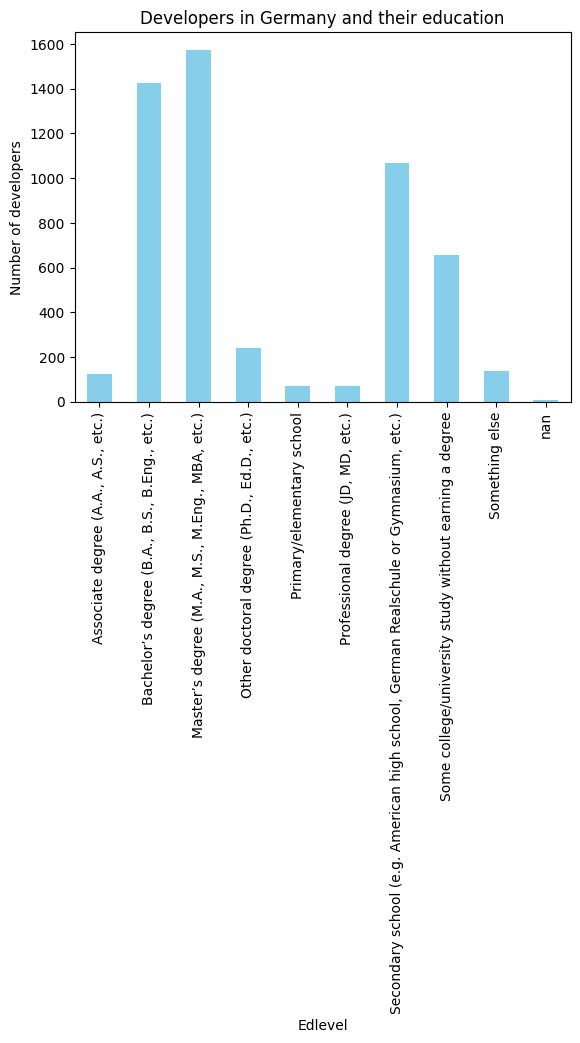

In [114]:
# Filtering only the germany rows from the "Country" column.
filtered_df = dataframe[dataframe['Country'] == 'Germany']

# Count each category of education level 
count_series = filtered_df['EdLevel'].value_counts().sort_index()

# Then we use the plot bar chart to get stat on our data
count_series.plot(kind='bar', color='skyblue')
plt.title('Developers in Germany and their education')
plt.xlabel('Edlevel')
plt.ylabel('Number of developers')

# Show the plot
plt.show()

### It seems that most of the developers in germany have at least bachelor's degree.

## Question 2: What is the most common MainBranch type these developers in the survey have?

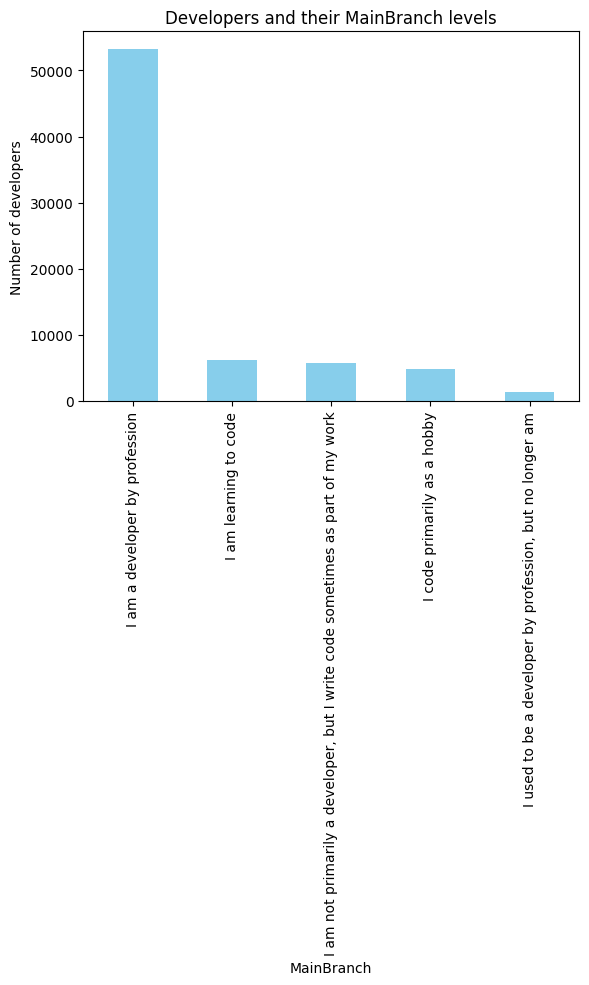

In [115]:
# Count 'MainBranch' rows
count_series = dataframe['MainBranch'].value_counts().sort_index()

# Then we use the plot bar chart to see the stats on developers and their education level 
count_series.plot(kind='bar', color='skyblue')
plt.title('Developers and their MainBranch levels')
plt.xlabel('MainBranch')
plt.ylabel('Number of developers')

# Show the plot
plt.show()

### It looks like that most developers in the survey are developers by profession, which is expected.

## Question 3: how many full time employees are working in something something?

OpSysProfessional use
Windows                                                                                    10190
macOS                                                                                       9449
Linux-based                                                                                 5844
Linux-based;macOS                                                                           3389
Linux-based;Windows                                                                         3247
Windows;Windows Subsystem for Linux (WSL)                                                   2398
Linux-based;Windows;Windows Subsystem for Linux (WSL)                                       1857
nan                                                                                         1785
macOS;Windows                                                                               1446
Linux-based;macOS;Windows                                                                    941
Linux-ba

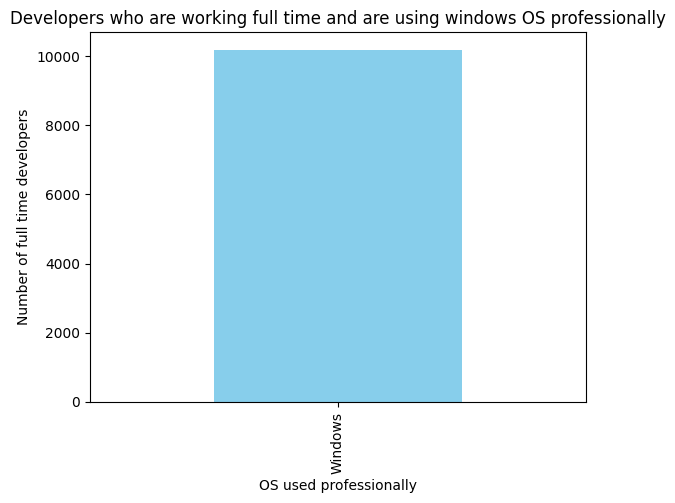

In [127]:
# Filter only full time developers rows
filtered_df_employement = dataframe[dataframe['Employment'] == 'Employed, full-time']

# Count the 'OpSysProfessional use' rows
count_series = filtered_df_employement['OpSysProfessional use'].value_counts()

print(count_series)
# Then only get the count of the "Windows" only value
Windows_series = count_series[['Windows']]

# Then we use the plot bar chart to get stat on our data
Windows_series.plot(kind='bar', color='skyblue')
plt.title('Developers who are working full time and are using windows OS professionally')
plt.xlabel('OS used professionally')
plt.ylabel('Number of full time developers')

# Show the plot
plt.show()

### So nearly 10,000 out of 10,190 full time developers use Windows OS only in their professional work, which means only few full time developers use other OSs or combinations of OSs.

### Creating a function to map for the categorical columns

In [97]:
def map_categorical_value(column):
'''
This function is for mapping the categorical data to numerical values. The function takes in the column name and 
returns the resulted numerical mapping of the column values

Input: 
column

Output:
Level_Map

'''
    Level_Map = {None: 0}
    for value in dataframe[column].unique():
        if value not in Level_Map:
            Level_Map[value] = len(Level_Map)
    return Level_Map

In [98]:
EdLevel_Map = map_categorical_value('EdLevel')

# EdLevel_Map = {None: 0}
# for value in dataframe['EdLevel'].unique():
#     if value not in EdLevel_Map:
#         EdLevel_Map[value] = len(EdLevel_Map)
# # print(EdLevel_Map)

In [99]:
MainBranch_Map = map_categorical_value('MainBranch')

In [100]:
Employment_Map = map_categorical_value('Employment')

In [101]:
LearnCode_Map = map_categorical_value('LearnCode')

In [102]:
BuyNewTool_Map = map_categorical_value('BuyNewTool')

In [103]:
OpSysProfessional_Map = map_categorical_value('OpSysProfessional use')

In [104]:
OpSysPersonal_Map = map_categorical_value('OpSysPersonal use')

In [105]:
NEWSOSites_Map = map_categorical_value('NEWSOSites')

In [106]:
SOVisitFreq_Map = map_categorical_value('SOVisitFreq')

In [107]:
SOAccount_Map = map_categorical_value('SOAccount')

In [108]:
SOComm_Map = map_categorical_value('SOComm')

In [109]:
Age_Map = map_categorical_value('Age')

### Mapping the new numerical columns to their categorical counterparts

In [110]:
dataframe.loc[:,'EdLevel'] = dataframe['EdLevel'].map(EdLevel_Map)
dataframe.loc[:,'Country'] = dataframe['Country'].map(country_Map)
dataframe.loc[:,'MainBranch'] = dataframe['MainBranch'].map(MainBranch_Map)
dataframe.loc[:,'Employment'] = dataframe['Employment'].map(Employment_Map)
dataframe.loc[:,'LearnCode'] = dataframe['LearnCode'].map(LearnCode_Map)
dataframe.loc[:,'BuyNewTool'] = dataframe['BuyNewTool'].map(BuyNewTool_Map)
dataframe.loc[:,'OpSysProfessional use'] = dataframe['OpSysProfessional use'].map(OpSysProfessional_Map)
dataframe.loc[:,'OpSysPersonal use'] = dataframe['OpSysPersonal use'].map(OpSysPersonal_Map)
dataframe.loc[:,'NEWSOSites'] = dataframe['NEWSOSites'].map(NEWSOSites_Map)
dataframe.loc[:,'SOVisitFreq'] = dataframe['SOVisitFreq'].map(SOVisitFreq_Map)
dataframe.loc[:,'SOAccount'] = dataframe['SOAccount'].map(SOAccount_Map)
dataframe.loc[:,'SOComm'] = dataframe['SOComm'].map(SOComm_Map)
dataframe.loc[:,'Age'] = dataframe['Age'].map(Age_Map)


In [111]:
dataframe.head()
# need to drop "NaN" values before changing the categorical columns

,ResponseId,MainBranch,Employment,EdLevel,LearnCode,YearsCode,BuyNewTool,Country,LanguageHaveWorkedWith,OpSysProfessional use,...,NEWSOSites,SOVisitFreq,SOAccount,SOComm,Age,LanguageHaveWorkedWith_1,LanguageHaveWorkedWith_2,LanguageHaveWorkedWith_3,LanguageHaveWorkedWith_4,LanguageHaveWorkedWith_5
2,3,1,1,1,1,14,1,1,C#;C++;HTML/CSS;JavaScript;Python,1,...,1,1,1,1,1,1,2,7,12,8
3,4,2,1,2,2,20,2,2,C#;JavaScript;SQL;TypeScript,1,...,2,2,1,2,2,1,12,28,27,0
4,5,2,1,2,3,8,3,3,C#;HTML/CSS;JavaScript;SQL;Swift;TypeScript,1,...,2,1,1,2,1,1,7,12,28,36
5,6,1,2,1,2,15,2,4,C++;Lua,2,...,3,1,1,2,1,2,29,0,0,0
6,7,3,3,3,4,3,3,5,C++;HTML/CSS;JavaScript;PHP;Python;TypeScript,3,...,4,1,1,2,3,2,7,12,20,8


### Now we can drop the 'LanguageHaveWorkedWith' column since it appears that the mapping has worked.

In [112]:
dataframe = dataframe.drop(['LanguageHaveWorkedWith'], axis=1)
dataframe.head()


,ResponseId,MainBranch,Employment,EdLevel,LearnCode,YearsCode,BuyNewTool,Country,OpSysProfessional use,OpSysPersonal use,NEWSOSites,SOVisitFreq,SOAccount,SOComm,Age,LanguageHaveWorkedWith_1,LanguageHaveWorkedWith_2,LanguageHaveWorkedWith_3,LanguageHaveWorkedWith_4,LanguageHaveWorkedWith_5
2,3,1,1,1,1,14,1,1,1,1,1,1,1,1,1,1,2,7,12,8
3,4,2,1,2,2,20,2,2,1,1,2,2,1,2,2,1,12,28,27,0
4,5,2,1,2,3,8,3,3,1,2,2,1,1,2,1,1,7,12,28,36
5,6,1,2,1,2,15,2,4,2,3,3,1,1,2,1,2,29,0,0,0
6,7,3,3,3,4,3,3,5,3,3,4,1,1,2,3,2,7,12,20,8


# Step 5: Data Correlation

### Creating a heatmap to show the correlation between different columns. We will be focusing on our y value here    

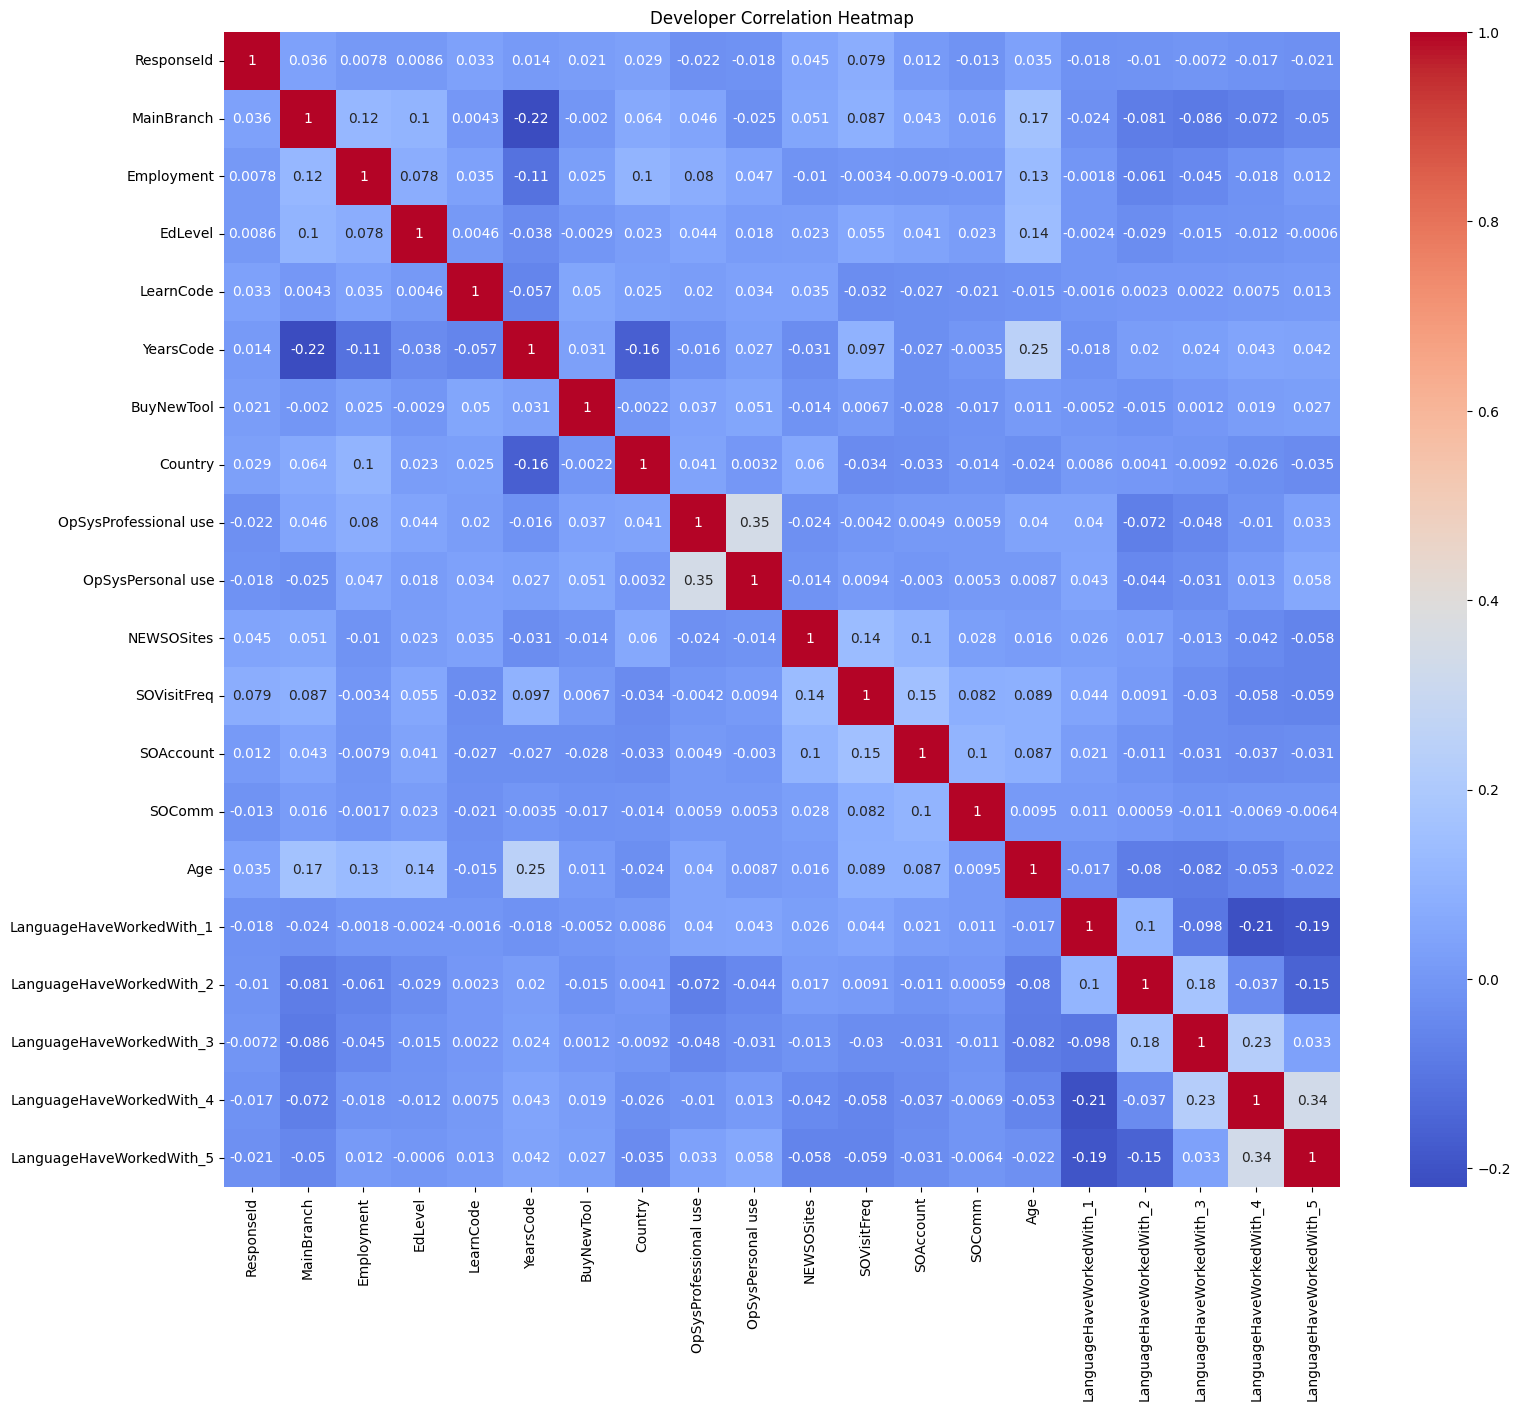

In [115]:
plt.figure(figsize=(18,15))
sns.heatmap(dataframe.corr(numeric_only=False), annot=True, cmap='coolwarm')
plt.title("Developer Correlation Heatmap")
plt.show()

#### It doesn't appear there is much of a correlation between most of the X values and y. However, we will go forward with these X values for now and see if we can make any changes after testing the model.

# Step 6: Data Modeling

### Now, we defind our Xs and y columns and create the test and train columns to train and test our model.

In [116]:
y = dataframe['YearsCode']
X = dataframe.drop('YearsCode', axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=50)

# Create a decision tree regressor object
dt_regressor = DecisionTreeRegressor(random_state=50)

# Train the model using the training data
dt_regressor.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = dt_regressor.predict(X_test)

# Evaluate the performance of the model
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 58.06256871564218


### Our model socre isn't high. Let's check other metrics such as the precision and F1 scores.

In [117]:
y_test = list(map(str, y_test))
# y_test = list(y_test)

y_pred = list(map(int, y_pred))
y_pred = list(map(str, y_pred))
# y_pred = list(y_pred)

In [118]:
# print(y_test)

# Step 7: Understanding the Results

### Precision score.

In [120]:
# measuring the precision of the model

F1Score = f1_score(y_test, y_pred, average = 'micro')
print("model F1 Score is: ", F1Score)

model F1 Score is:  0.08935532233883059


### Recall score.

In [121]:
# measuring the Recall of the model

Recall = recall_score(y_test, y_pred, average = 'micro')
print("model Recall score is: ", Recall)

model Recall score is:  0.08935532233883059


### Recall score.

In [122]:
# measuring the F1 Score of the model

precision = precision_score(y_test, y_pred, average = 'micro')
print("model precision is: ", precision)

model precision is:  0.08935532233883059


In [ ]:
# review of the model and data to be done for futher improving the results. 